In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('credit_card.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667
1,C10002,3202.467416,0.909091,NaN,0.00,0.0,6442.945483,0.000000
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333


In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY
count,30.000000,30.000000,28.000000,30.000000,30.000000,30.000000,30.000000
mean,2011.591350,0.914015,1270.608214,886.739333,329.832333,782.627362,0.544445
std,2085.060899,0.152917,1843.149440,1684.860206,412.760807,1907.883942,0.390705
min,22.057057,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000
25%,307.651354,0.883523,158.010000,0.000000,0.000000,0.000000,0.166667
50%,1566.447930,1.000000,470.275000,0.000000,191.250000,0.000000,0.583333
75%,2703.366766,1.000000,1493.885000,1154.492500,446.482500,240.887425,1.000000
max,7152.865301,1.000000,7091.010000,6402.630000,1611.700000,7974.415626,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CUST_ID                 30 non-null     object 
 1   BALANCE                 30 non-null     float64
 2   BALANCE_FREQUENCY       30 non-null     float64
 3   PURCHASES               28 non-null     float64
 4   ONEOFF_PURCHASES        30 non-null     float64
 5   INSTALLMENTS_PURCHASES  30 non-null     float64
 6   CASH_ADVANCE            30 non-null     float64
 7   PURCHASES_FREQUENCY     30 non-null     float64
dtypes: float64(7), object(1)
memory usage: 2.0+ KB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
print('PURCHASES')
print(df['PURCHASES'].unique())
print()
print('PURCHASES_FREQUENCY')
print(df['PURCHASES_FREQUENCY'].unique())
print()

PURCHASES
[  95.4      nan  773.17 1499.     16.   1333.28 7091.01  436.2   861.49
 1281.6  1492.18 3217.99 2138.73    0.   1611.7   519.    504.35  398.64
  176.68 6359.95  300.   4248.35  399.98  102.    233.28  387.05  100.  ]

PURCHASES_FREQUENCY
[0.166667 0.       1.       0.083333 0.666667 0.333333 0.25     0.75
 0.5      0.416667]



<Axes: xlabel='PURCHASES', ylabel='count'>

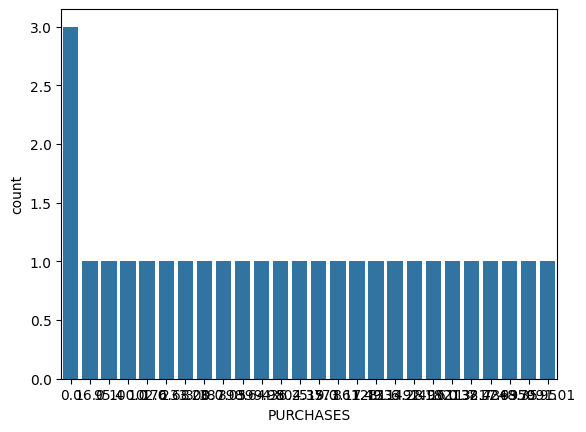

In [8]:
sns.countplot(x='PURCHASES',data=df)

In [9]:
df.isnull().sum()

CUST_ID                   0
BALANCE                   0
BALANCE_FREQUENCY         0
PURCHASES                 2
ONEOFF_PURCHASES          0
INSTALLMENTS_PURCHASES    0
CASH_ADVANCE              0
PURCHASES_FREQUENCY       0
dtype: int64

In [10]:
df.PURCHASES.fillna(df['PURCHASES'].mean(),inplace=True)
print(df.isnull().sum())

CUST_ID                   0
BALANCE                   0
BALANCE_FREQUENCY         0
PURCHASES                 0
ONEOFF_PURCHASES          0
INSTALLMENTS_PURCHASES    0
CASH_ADVANCE              0
PURCHASES_FREQUENCY       0
dtype: int64


C:\Users\sruth\AppData\Local\Temp\ipykernel_27376\1418853161.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.PURCHASES.fillna(df['PURCHASES'].mean(),inplace=True)


In [11]:
df.replace(np.nan,'0',inplace=True)
df.isnull().sum()

CUST_ID                   0
BALANCE                   0
BALANCE_FREQUENCY         0
PURCHASES                 0
ONEOFF_PURCHASES          0
INSTALLMENTS_PURCHASES    0
CASH_ADVANCE              0
PURCHASES_FREQUENCY       0
dtype: int64

In [12]:
df.dtypes

CUST_ID                    object
BALANCE                   float64
BALANCE_FREQUENCY         float64
PURCHASES                 float64
ONEOFF_PURCHASES          float64
INSTALLMENTS_PURCHASES    float64
CASH_ADVANCE              float64
PURCHASES_FREQUENCY       float64
dtype: object

In [13]:
df[df['PURCHASES_FREQUENCY']==0.5].head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY
15,C10016,6886.213231,1.0,1611.7,0.0,1611.7,2301.499122,0.5


<Axes: >

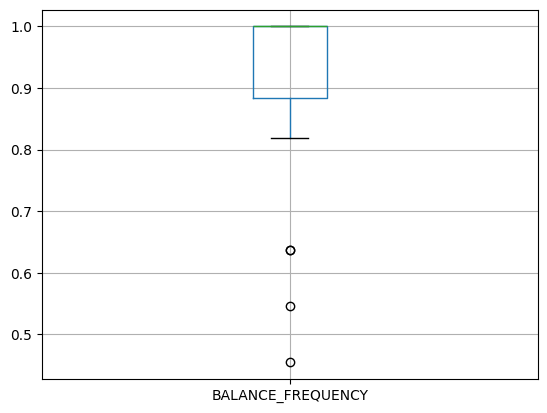

In [14]:
df[["BALANCE_FREQUENCY"]].boxplot()

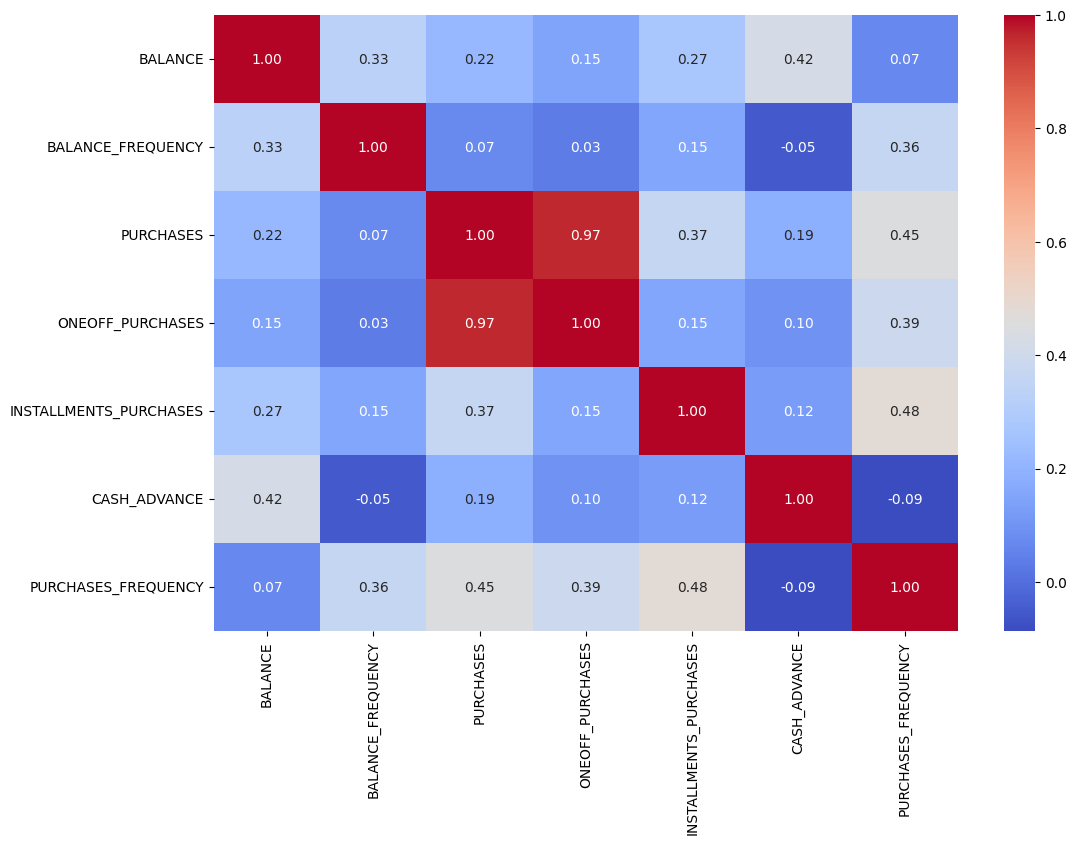

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation only for numeric columns
correlation_matrix = df.corr(numeric_only=True)

# Generate the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [16]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


Text(0.5, 1.0, 'Histogram')

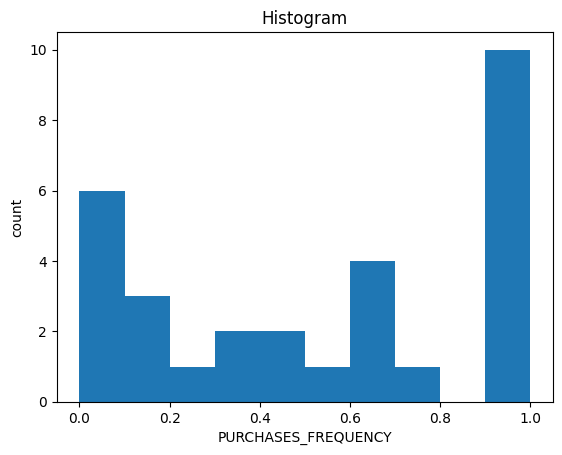

In [17]:
plt.hist(df['PURCHASES_FREQUENCY'])
plt.xlabel('PURCHASES_FREQUENCY')
plt.ylabel('count')
plt.title('Histogram')

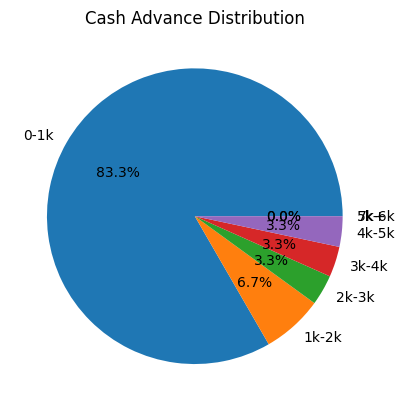

In [18]:
df['CASH_BINS'] = pd.cut(df['CASH_ADVANCE'], bins=7)

counts = df['CASH_BINS'].value_counts()

CASH_ADVANCE_LABELS = '0-1k', '1k-2k', '2k-3k', '3k-4k', '4k-5k', '5k-6k', '7k+'


plt.pie(counts, labels=CASH_ADVANCE_LABELS, autopct='%1.1f%%')
plt.title('Cash Advance Distribution')
plt.show()

<Axes: ylabel='Density'>

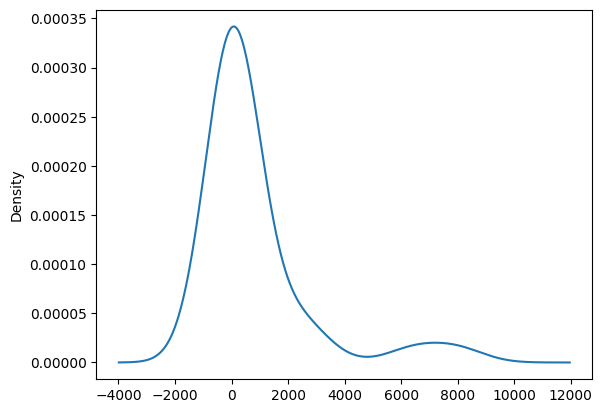

In [19]:
plt.figure()
df['CASH_ADVANCE'].plot(kind='density')

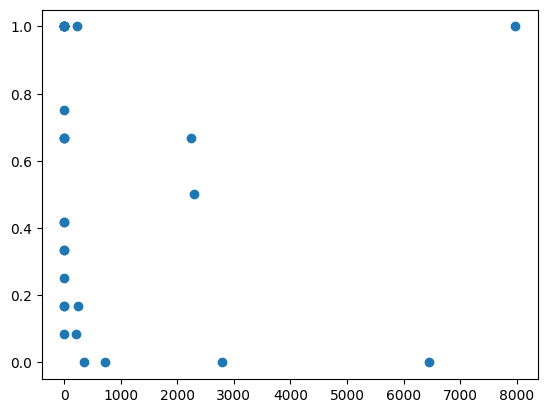

In [20]:
plt.scatter('CASH_ADVANCE','PURCHASES_FREQUENCY',data=df)

<Axes: xlabel='PURCHASES_FREQUENCY', ylabel='CASH_ADVANCE'>

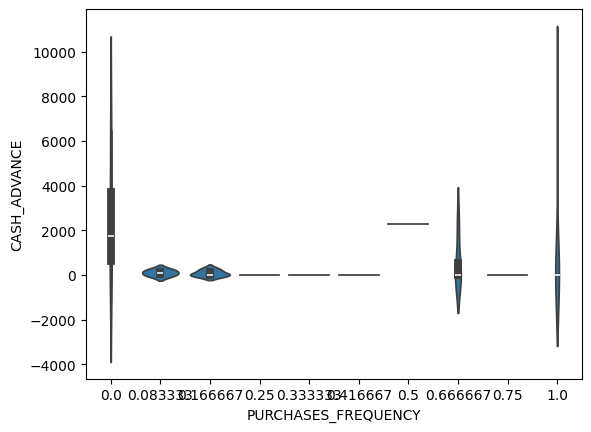

In [ ]:
sns.violinplot(y='CASH_ADVANCE',x='PURCHASES_FREQUENCY',data=df, orient='vertical')

<Axes: xlabel='PURCHASES_FREQUENCY', ylabel='PURCHASES'>

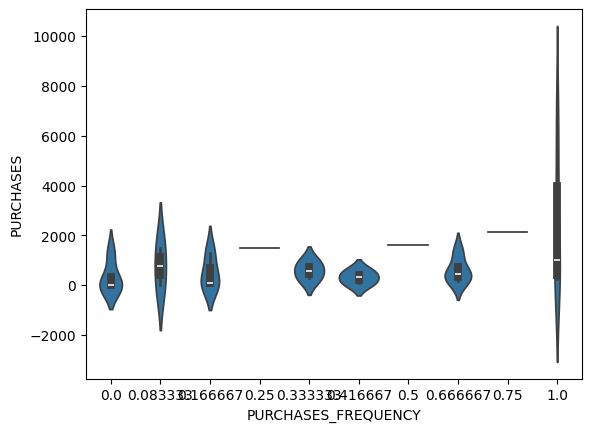

In [22]:
sns.violinplot(y='PURCHASES',x='PURCHASES_FREQUENCY',data=df, orient='vertical')

<Figure size 300x400 with 0 Axes>

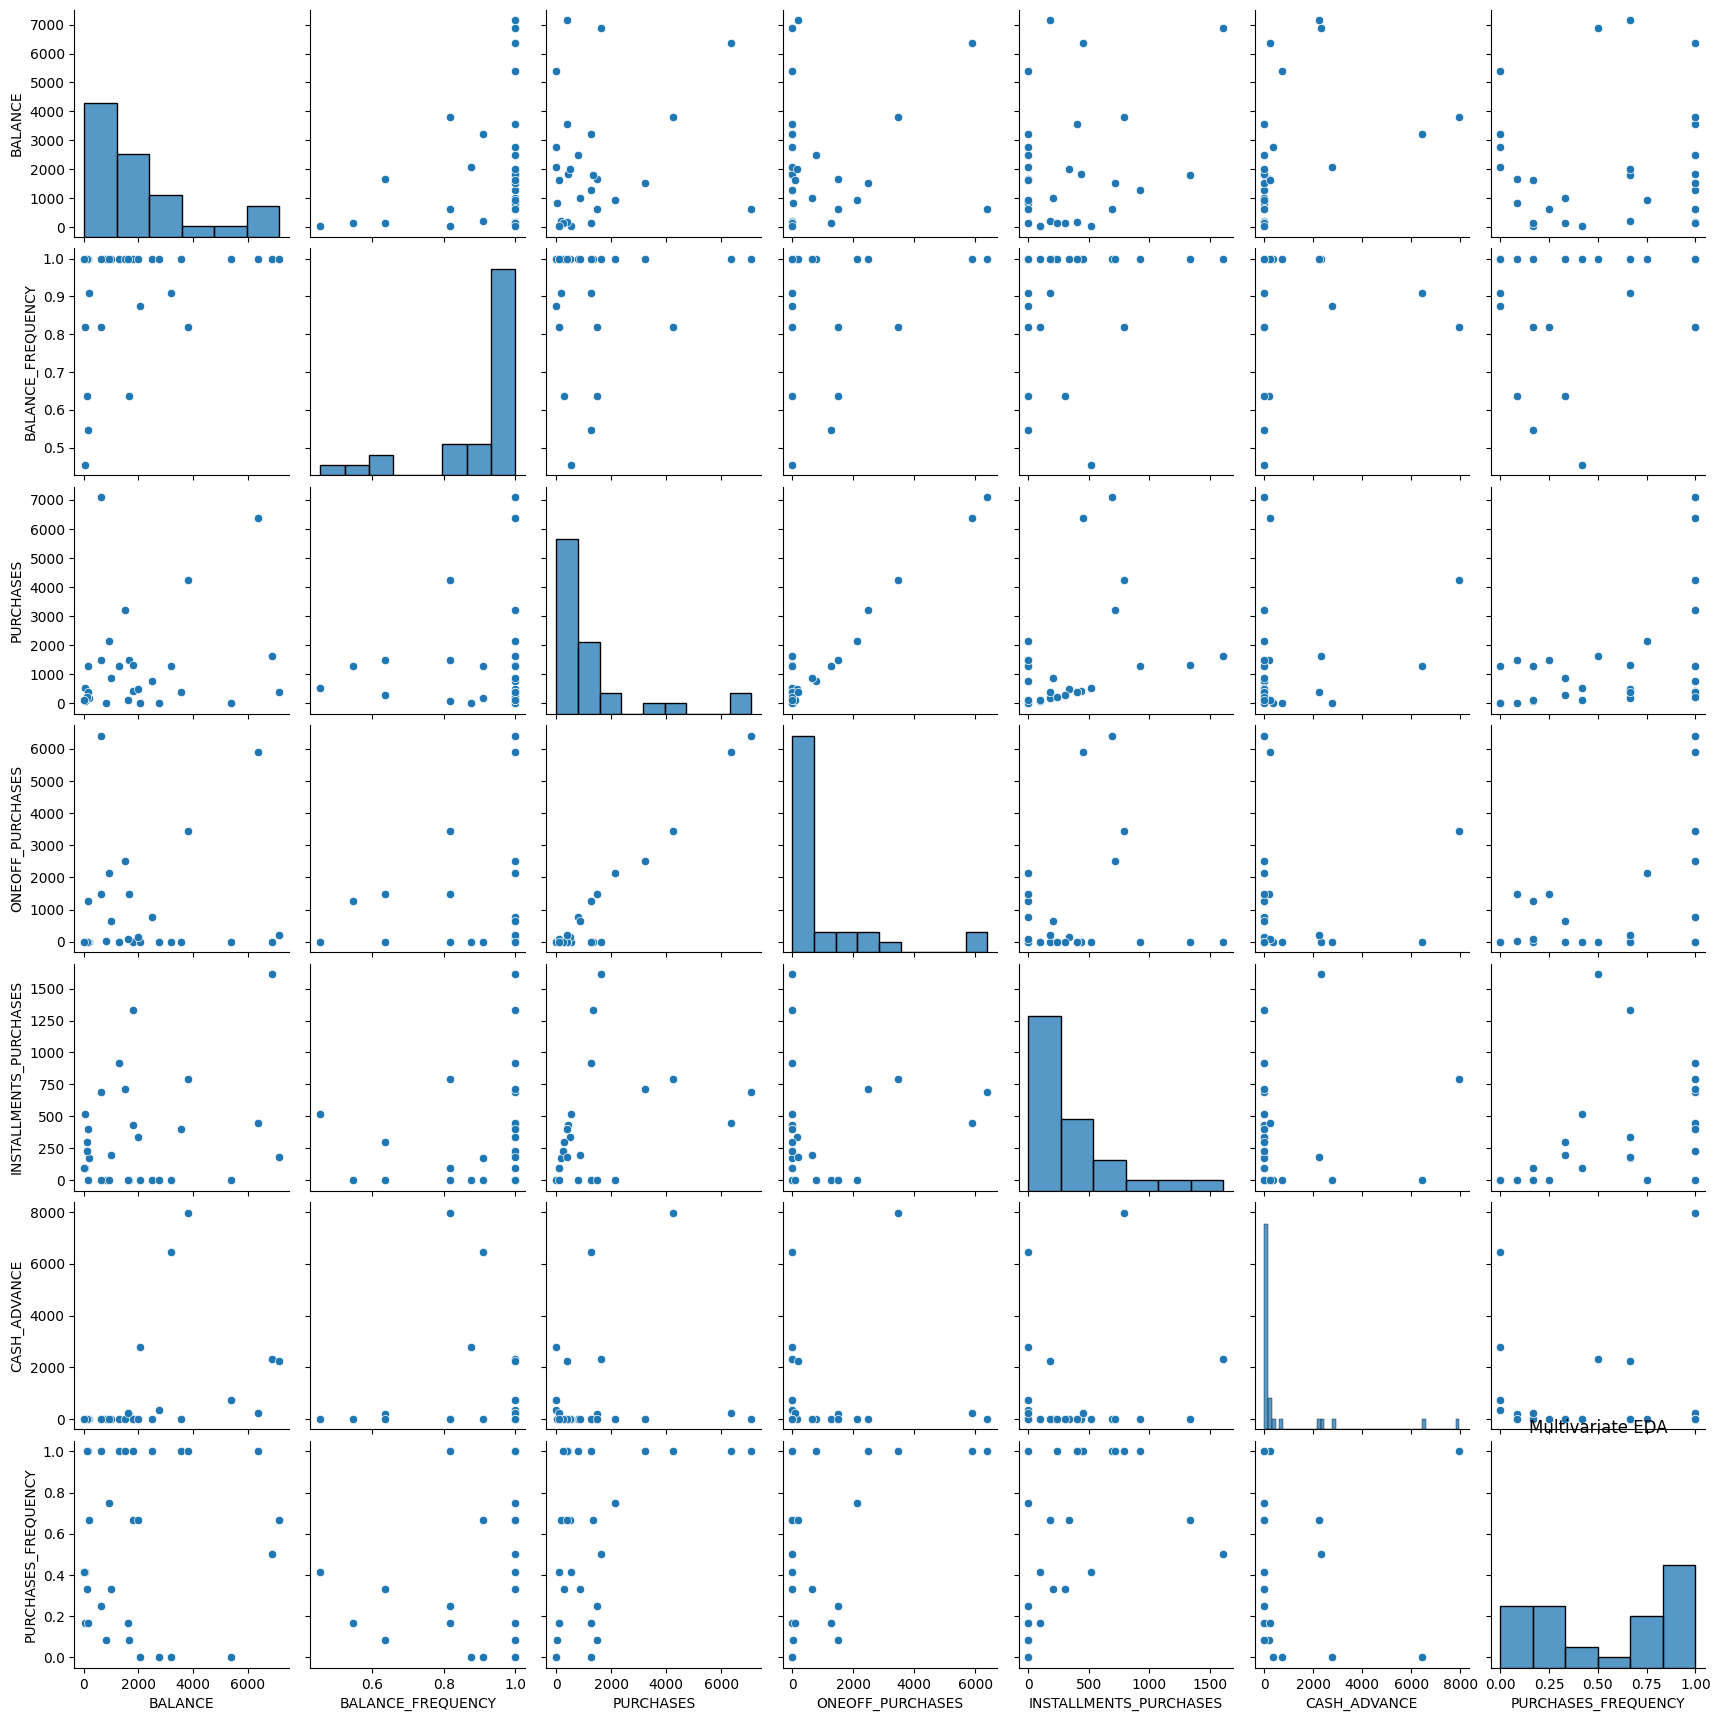

In [23]:
def multivariate_eda(df):
    plt.figure(figsize=(3,4))
    sns.pairplot(df)
    plt.title('Multivariate EDA')
    plt.show()

multivariate_eda(df)